Demo For Data Loader

In [10]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import torch
import torchaudio
from data_loader.data_loaders import get_data_loaders
import random

torchaudio.set_audio_backend("soundfile")

base_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'dataset'))

train_loader, test_loader, val_loader = get_data_loaders(base_path=base_path, batch_size=4)

# Get a batch of data from both loaders
train_batch = next(iter(train_loader))
test_batch = next(iter(test_loader))
val_batch = next(iter(val_loader))

train_waveforms, train_labels = train_batch
test_waveforms, test_labels = test_batch
valid_waveforms, valid_labels = val_batch


C:\Users\trema\AppData\Local\Temp\ipykernel_27572\3249485337.py:11: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
c:\Users\trema\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
c:\Users\trema\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
c:\Users\trema\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or,

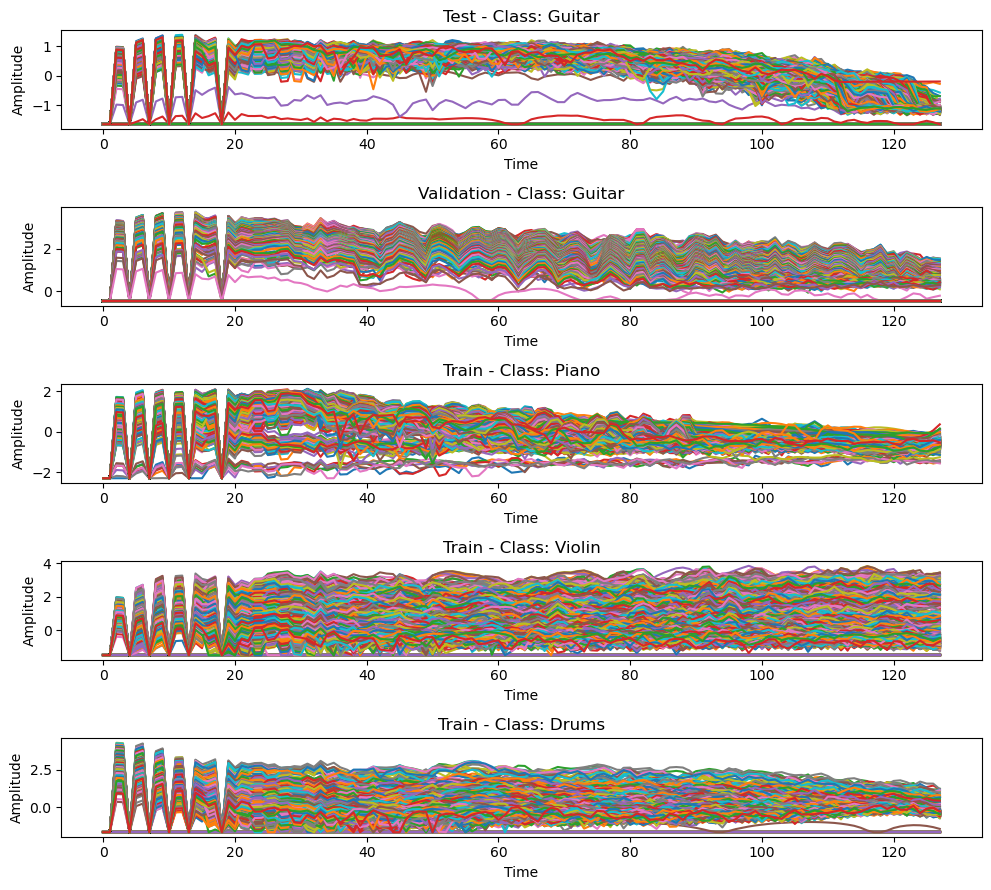

In [ ]:
label_to_class = {0: 'Guitar', 1: 'Drums', 2: 'Violin', 3: 'Piano'}

datasets = {
    "Train": (train_waveforms, train_labels),
    "Test": (test_waveforms, test_labels),
    "Validation": (valid_waveforms, valid_labels)
}

num_plots = 5
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 9))

selected_samples = []
for dataset_name, (waveforms, labels) in datasets.items():
    unique_classes = list(set(labels.numpy()))
    class_indices = {cls: (labels == cls).nonzero(as_tuple=True)[0].tolist() for cls in unique_classes}

    # Randomly pick a sample for each class (or as many as possible)
    for cls in unique_classes:
        if class_indices[cls]:
            selected_samples.append((dataset_name, waveforms[random.choice(class_indices[cls])], cls))

random.shuffle(selected_samples)

# Plot selected waveforms with class labels
for i, (dataset_name, waveform, cls) in enumerate(selected_samples[:num_plots]):
    waveform = waveform.squeeze().cpu().numpy()
    class_name = label_to_class.get(cls, "Unknown")  

    axes[i].plot(waveform)
    axes[i].set_title(f"{dataset_name} - Class: {class_name}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()